In [1]:
import pandas as pd
import numpy as np

In [2]:
df_m = pd.read_csv(r"C:\Users\CHARISHMA\Downloads\movie_data\movies.csv")
df_r = pd.read_csv(r"C:\Users\CHARISHMA\Downloads\movie_data\ratings.csv")
df_t = pd.read_csv(r"C:\Users\CHARISHMA\Downloads\movie_data\tags.csv")
df_l = pd.read_csv(r"C:\Users\CHARISHMA\Downloads\movie_data\links.csv")

In [3]:
df_m.shape

(9742, 3)

In [4]:
df_r.shape

(100836, 4)

In [5]:
df_m.columns

Index(['movieId', 'title', 'genres'], dtype='object')

In [6]:
df_t.columns

Index(['userId', 'movieId', 'tag', 'timestamp'], dtype='object')

In [7]:
df_r.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [8]:
df_l.columns

Index(['movieId', 'imdbId', 'tmdbId'], dtype='object')

In [9]:
df_r

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [10]:
df_m['movieId'].nunique()

9742

In [11]:
df_r['userId'].nunique()

610

In [12]:
df_m

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [13]:
df_m.merge(df_r,on='movieId')

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483
...,...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0,1537109082
100832,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5,1537109545
100833,193585,Flint (2017),Drama,184,3.5,1537109805
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,3.5,1537110021


In [14]:
df_m.merge(df_r,on='movieId').groupby('title')['rating'].count().sort_values(ascending=False)

title
Forrest Gump (1994)                          329
Shawshank Redemption, The (1994)             317
Pulp Fiction (1994)                          307
Silence of the Lambs, The (1991)             279
Matrix, The (1999)                           278
                                            ... 
King Solomon's Mines (1950)                    1
King Solomon's Mines (1937)                    1
King Ralph (1991)                              1
King Kong Lives (1986)                         1
À nous la liberté (Freedom for Us) (1931)      1
Name: rating, Length: 9719, dtype: int64

In [15]:
df_t

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


### Select all the correct tags submitted by users to "Matrix, The (1999)" movie?

In [16]:
df_mat = df_m.merge(df_t,on='movieId')

In [17]:
df_mat

,movieId,title,genres,userId,tag,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336,pixar,1139045764
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,474,pixar,1137206825
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,567,fun,1525286013
3,2,Jumanji (1995),Adventure|Children|Fantasy,62,fantasy,1528843929
4,2,Jumanji (1995),Adventure|Children|Fantasy,62,magic board game,1528843932
...,...,...,...,...,...,...
3678,187595,Solo: A Star Wars Story (2018),Action|Adventure|Children|Sci-Fi,62,star wars,1528934552
3679,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,anime,1537098582
3680,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,comedy,1537098587
3681,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,gintama,1537098603


In [18]:
df_mat[df_mat['title']=='Matrix, The (1999)']['tag']

1313          martial arts
1314                sci-fi
1315    alternate universe
1316            philosophy
1317      post apocalyptic
Name: tag, dtype: object

### What is the average user rating for movie named "Terminator 2: Judgment Day (1991)"?

In [19]:
df_mr = df_m.merge(df_r,on='movieId')

In [20]:
df_mr[df_mr['movieId']==589]['rating'].mean()

3.970982142857143

In [21]:
df_m[df_m['title']=='Terminator 2: Judgment Day (1991)']

,movieId,title,genres
507,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi


In [22]:
df_r[df_r['movieId']==589]

,userId,movieId,rating,timestamp
552,5,589,3.0,847435258
806,6,589,3.0,845553317
886,7,589,2.5,1106635940
1286,11,589,4.0,902154266
1449,15,589,5.0,1510572012
...,...,...,...,...
97461,606,589,3.5,1171325855
98514,607,589,4.0,963078960
98786,608,589,3.0,1117415154
99519,609,589,3.0,847220990


### How does the data distribution of user ratings for "Fight Club (1999)" movie looks like?

In [23]:
df_m[df_m['title']=='Fight Club (1999)']

,movieId,title,genres
2226,2959,Fight Club (1999),Action|Crime|Drama|Thriller


<Axes: ylabel='Density'>

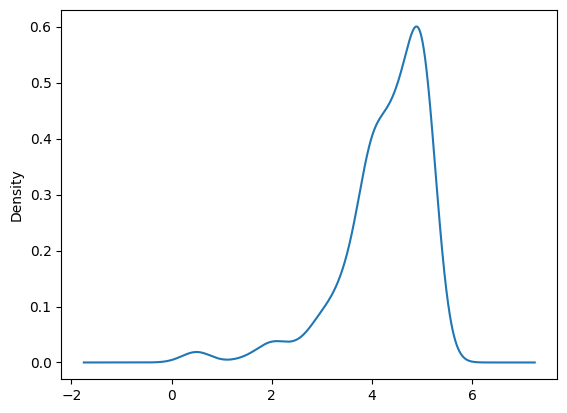

In [24]:
df_mr[df_mr['title']=='Fight Club (1999)']['rating'].plot(kind='kde')

In [25]:
1. Group the user ratings based on movieId and apply aggregation operations like count and mean on ratings. 
2. Apply inner join on dataframe created from movies.csv and the grouped df from step 1.
3. Filter only those movies which have more than 50 user ratings (i.e. > 50).

SyntaxError: invalid syntax (794673603.py, line 1)

In [ ]:
df_mr.groupby('rating')['movieId'].count()

In [26]:
df_50 = df_mr.groupby('movieId')['rating'].count().reset_index()

In [27]:
df_50

,movieId,rating
0,1,215
1,2,110
2,3,52
3,4,7
4,5,49
...,...,...
9719,193581,1
9720,193583,1
9721,193585,1
9722,193587,1


In [28]:
df_50 = df_50[df_50['rating']>50]

In [29]:
df_50

,movieId,rating
0,1,215
1,2,110
2,3,52
5,6,102
6,7,54
...,...,...
8287,106782,54
8354,109374,52
8358,109487,73
8457,112852,59


In [30]:
df_50 = df_50.rename(columns={'rating':'count of ratings'})

### Which movie is the most popular based on  average user ratings?

In [31]:
df_mrr5 = df_mr.merge(df_50,on='movieId')

In [32]:
df_mrr5

,movieId,title,genres,userId,rating,timestamp,count of ratings
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,215
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,215
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946,215
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970,215
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483,215
...,...,...,...,...,...,...,...
40655,122904,Deadpool (2016),Action|Adventure|Comedy|Sci-Fi,561,2.0,1491095067,54
40656,122904,Deadpool (2016),Action|Adventure|Comedy|Sci-Fi,586,4.0,1529899267,54
40657,122904,Deadpool (2016),Action|Adventure|Comedy|Sci-Fi,596,4.0,1535709074,54
40658,122904,Deadpool (2016),Action|Adventure|Comedy|Sci-Fi,599,3.5,1519457935,54


In [33]:
df_mrr5.groupby('title')['rating'].mean().reset_index().sort_values(by='rating',ascending=False)

,title,rating
343,"Shawshank Redemption, The (1994)",4.429022
170,"Godfather, The (1972)",4.289062
151,Fight Club (1999),4.272936
107,Cool Hand Luke (1967),4.271930
131,Dr. Strangelove or: How I Learned to Stop Worr...,4.268041
...,...,...
221,Johnny Mnemonic (1995),2.679245
222,Judge Dredd (1995),2.669355
94,City Slickers II: The Legend of Curly's Gold (...,2.645455
104,Coneheads (1993),2.420635


In [34]:
df_mrr5.groupby('title')['count of ratings'].mean().reset_index().sort_values(by='count of ratings',ascending=False)

,title,count of ratings
156,Forrest Gump (1994),329.0
343,"Shawshank Redemption, The (1994)",317.0
314,Pulp Fiction (1994),307.0
350,"Silence of the Lambs, The (1991)",279.0
260,"Matrix, The (1999)",278.0
...,...,...
42,Bad Boys (1995),51.0
31,Army of Darkness (1993),51.0
387,The Devil's Advocate (1997),51.0
278,Mulholland Drive (2001),51.0


### Select all the correct options which comes under top 5 popular movies based on number of user ratings.

In [35]:
df_mrr5.groupby('title')['count of ratings'].mean().reset_index().sort_values(by='count of ratings',ascending=False).head(5)

,title,count of ratings
156,Forrest Gump (1994),329.0
343,"Shawshank Redemption, The (1994)",317.0
314,Pulp Fiction (1994),307.0
350,"Silence of the Lambs, The (1991)",279.0
260,"Matrix, The (1999)",278.0


### Which Sci-Fi movie is "third most popular" based on the number of user ratings?

In [36]:
df_mrr5

,movieId,title,genres,userId,rating,timestamp,count of ratings
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,215
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,215
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946,215
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970,215
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483,215
...,...,...,...,...,...,...,...
40655,122904,Deadpool (2016),Action|Adventure|Comedy|Sci-Fi,561,2.0,1491095067,54
40656,122904,Deadpool (2016),Action|Adventure|Comedy|Sci-Fi,586,4.0,1529899267,54
40657,122904,Deadpool (2016),Action|Adventure|Comedy|Sci-Fi,596,4.0,1535709074,54
40658,122904,Deadpool (2016),Action|Adventure|Comedy|Sci-Fi,599,3.5,1519457935,54


In [37]:
df_t

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


In [38]:
df_mrt = df_mrr5.merge(df_t,on='movieId')

In [39]:
df_mrt

,movieId,title,genres,userId_x,rating,timestamp_x,count of ratings,userId_y,tag,timestamp_y
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,215,336,pixar,1139045764
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,215,474,pixar,1137206825
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,215,567,fun,1525286013
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,215,336,pixar,1139045764
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,215,474,pixar,1137206825
...,...,...,...,...,...,...,...,...,...,...
194078,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,601,4.0,1521467672,59,567,unlikely hero,1525285378
194079,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,610,4.5,1493845402,59,567,funny,1525285382
194080,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,610,4.5,1493845402,59,567,Great Visuals,1525285333
194081,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,610,4.5,1493845402,59,567,humorous,1525285336


In [40]:
df_t

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


In [53]:
sci_fi_movies = df_mrr5[df_mrr5['genres'].str.contains('Sci-Fi')]
ratings_count = sci_fi_movies.groupby('title')['rating'].count().reset_index()
third_most_popular_sci_fi_movie = ratings_count.nlargest(3, 'rating').iloc[-1]
print(f"{third_most_popular_sci_fi_movie}")

title     Jurassic Park (1993)
rating                     238
Name: 40, dtype: object


In [41]:
df_l.sort_values(by='tmdbId',ascending=False)

,movieId,imdbId,tmdbId
9719,189111,5359048,525662.0
585,720,118114,503475.0
9690,184257,5189670,502892.0
9695,184791,7924798,502616.0
9702,185135,1665071,500609.0
...,...,...,...
3027,4051,56600,NaN
5532,26587,92337,NaN
5854,32600,377059,NaN
6059,40697,105946,NaN


In [42]:
import requests
import numpy as np
from bs4 import BeautifulSoup

def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0"*n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    request_header = {'Content-Type': 'text/html; charset=UTF-8', 
                      'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0', 
                      'Accept-Encoding': 'gzip, deflate, br'}
    response = requests.get(URL, headers=request_header)
    soup = BeautifulSoup(response.text)
    imdb_rating = soup.find('span', attrs={'itemprop': 'ratingValue'})
    return imdb_rating.text if imdb_rating else np.nan

In [44]:
# Example usage of the scrapper function
imdbId = "105946"  # Replace this with the IMDb ID of the movie you're interested in
imdb_rating = scrapper(imdbId)

# Display the output
print(f"IMDb Rating for movie with IMDb ID {imdbId}: {imdb_rating}")


IMDb Rating for movie with IMDb ID 105946: nan
